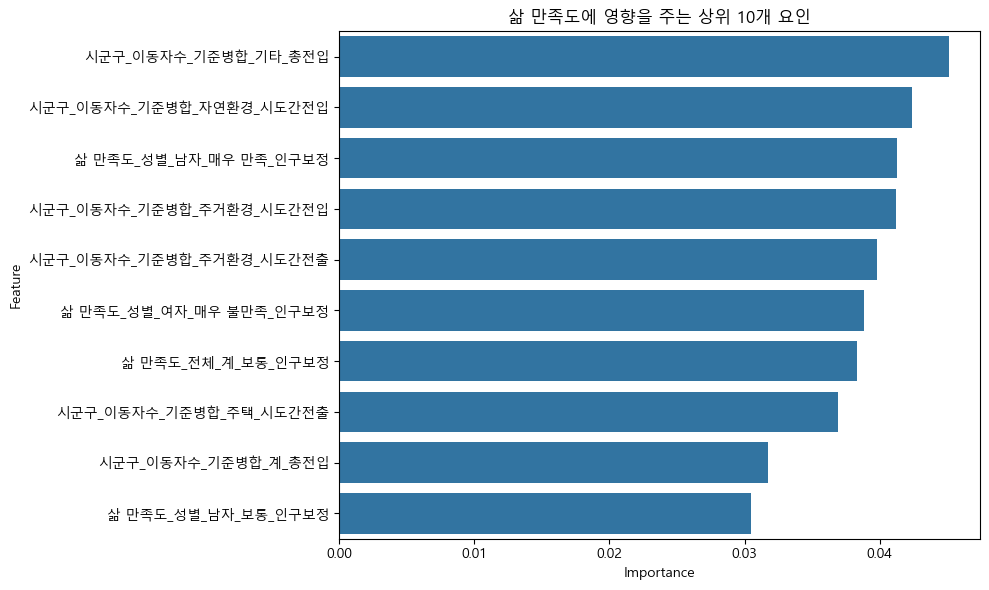

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
file_path = "통합데이터_출처정리완료 - 만족도 추가 - 프랜차이즈 제거.csv"
df = pd.read_csv(file_path)

# 타겟과 입력 변수 설정
target_col = "삶 만족도_전체_계_매우 만족_인구보정"
y = df[target_col]
X = df.drop(columns=[target_col])

# 수치형 변수만 사용
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=1)

# 타겟 결측치 제거
mask = ~y.isna()
X = X[mask]
y = y[mask]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 특성 중요도 추출
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("삶 만족도에 영향을 주는 상위 10개 요인")
plt.tight_layout()
plt.show()
